In [39]:
%pip install gymnasium[box2d]
%pip install numpy
%pip install torch
%pip install matplotlib
%pip install moviepy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/388.3 kB ? eta -:--:--
     - -------------------------------------- 10.2/388.3 kB ? eta -:--:--
     ----- ------------------------------- 61.4/388.3 kB 656.4 kB/s eta 0:00:01
     ------------------- ------------------ 194.6/388.3 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 388.3/388.3 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB ? eta 0:00:00
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.7-py3-none-any

In [2]:
import numpy as np
from LunarExplorer_env import LunarLanderEnv
import matplotlib.pyplot as plt
from moviepy.editor import ImageSequenceClip


# Create the environment
env = LunarLanderEnv()

# Reset the environment to get the initial state
state, info = env.reset()

# Print state and action space details
print(f'State space dimension: {env.state_space}')
print(f'Action space dimension: {env.action_space}')

State space dimension: 8
Action space dimension: 4


In [3]:
# Sample an action
action = np.random.choice(env.A)
print(f'Sampled action: {action}')

# Take a step in the environment
next_state, reward, done, truncated, info = env.step(action)

# Print the results of the step
print(f'Next state: {next_state}')
print(f'Reward: {reward}')
print(f'Done: {done}')
print(f'Truncated: {truncated}')
print(f'Info: {info}')

Sampled action: 0
Next state: [ 0.00993128  1.4322503   0.50226206  0.46112305 -0.01137636 -0.11259548
  0.          0.        ]
Reward: 0.2109289361991955
Done: False
Truncated: False
Info: {}


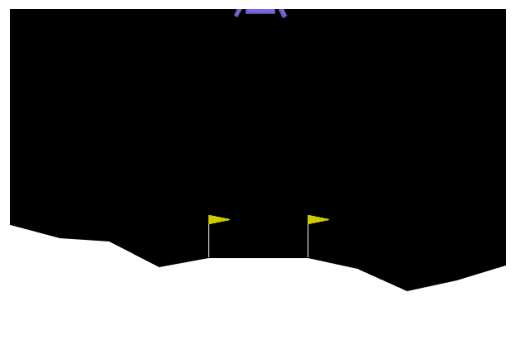

In [4]:
# Render the environment and display the image
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

image = env.env.render()
display_image(image)



taking action of 0 to lunar lander
taking action of 2 to lunar lander
taking action of 0 to lunar lander
taking action of 1 to lunar lander


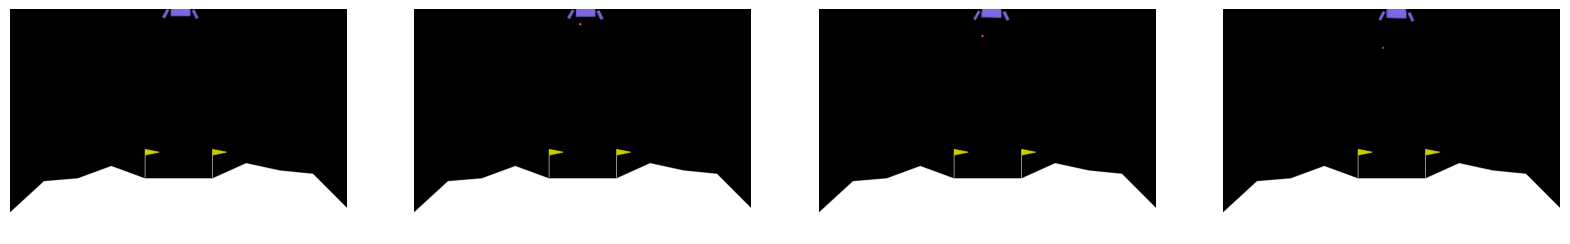

In [5]:
# Function to display multiple images in one row
def display_images(images, titles=None):
    fig, axes = plt.subplots(1, len(images), figsize=(20, 5))
    for i, image in enumerate(images):
        if titles:
            axes[i].set_title(titles[i])
        axes[i].imshow(image)
        axes[i].axis('off')
    plt.show()

# Create the environment
env = LunarLanderEnv()

# Reset the environment to get the initial state
state, info = env.reset()

# List to store the frames
frames = []

# Perform steps and collect frames
for _ in range(4):
    action = np.random.choice(env.A)  # Take a random action
    print(f'taking action of {action} to lunar lander')
    next_state, reward, done, truncated, info = env.step(action)
    frame = env.env.render()
    frames.append(frame)

    if done:
        break
    state = next_state

# Display the frames
display_images(frames)

# Close the environment properly
env.env.close()


In [6]:
# Additional exploration: Run multiple episodes and collect more information
num_episodes = 5

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    step_count = 0
    
    while not done:
        action = np.random.choice(env.A)
        next_state, reward, done, truncated, info = env.step(action)
        total_reward += reward
        step_count += 1
        
        if done:
            break
    
    print(f'Episode {episode + 1}: Total Reward = {total_reward}, Steps = {step_count}')
    env.render()

# Close the environment properly
env.env.close()

Episode 1: Total Reward = -325.9674912081335, Steps = 100
Episode 2: Total Reward = -181.0403657168561, Steps = 85
Episode 3: Total Reward = -151.0395354855475, Steps = 88
Episode 4: Total Reward = -250.25768013778435, Steps = 101
Episode 5: Total Reward = -229.5920762175146, Steps = 100


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim

class Actor(nn.Module):
    def __init__(self, state_space, action_space):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_space, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, action_space)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=-1)  # Output a probability distribution
        return x

class Critic(nn.Module):
    def __init__(self, state_space):
        super(Critic, self).__init__()
        self.fc1 = nn.Linear(state_space, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Output a scalar value
        return x

# Example usage
state_space = 8  # for LunarLander-v2
action_space = 4  # for LunarLander-v2

actor = Actor(state_space, action_space)
critic = Critic(state_space)

print(actor)
print(critic)

Actor(
  (fc1): Linear(in_features=8, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)
Critic(
  (fc1): Linear(in_features=8, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)


In [8]:
# Example state input
state = torch.FloatTensor([0.0] * state_space).unsqueeze(0)

# Forward pass through actor
action_probs = actor(state)
print("Action probabilities:", action_probs)

# Forward pass through critic
state_value = critic(state)
print("State value:", state_value)

Action probabilities: tensor([[0.2589, 0.2399, 0.2640, 0.2372]], grad_fn=<SoftmaxBackward0>)
State value: tensor([[-0.0411]], grad_fn=<AddmmBackward0>)


In [9]:
def compute_advantage(state, reward, next_state, done, gamma):
    state = torch.FloatTensor(state).unsqueeze(0)
    next_state = torch.FloatTensor(next_state).unsqueeze(0)
    target_value = reward + (1 - done) * gamma * critic(next_state)
    advantage = target_value - critic(state)
    return advantage


Episode 10, Reward: -300.0497324369382
Episode 20, Reward: -34.53511429582953
Episode 30, Reward: -99.96901646342728
Episode 40, Reward: -198.97454087806514
Episode 50, Reward: -32.44945431556354
Episode 60, Reward: -157.55324456754184
Episode 70, Reward: 90.88733879858856
Episode 80, Reward: -110.80875215876583
Episode 90, Reward: 192.11789594360383
Episode 100, Reward: 266.735096128387
Episode 110, Reward: -53.89599504269483
Episode 120, Reward: 232.4855752680493
Episode 130, Reward: 55.782009065859455
Episode 140, Reward: 222.14668893353684
Episode 150, Reward: -130.89828676879935
Episode 160, Reward: -58.96199801875301
Episode 170, Reward: 8.124676896474185
Episode 180, Reward: 234.44576872567825
Episode 190, Reward: -27.26353866390967
Episode 200, Reward: 231.80004471577666
Episode 210, Reward: -71.80060804978247
Episode 220, Reward: 254.72734932237594
Episode 230, Reward: 28.15908617542783
Episode 240, Reward: 214.05235722671082
Episode 250, Reward: 234.26738014586977
Episode 260

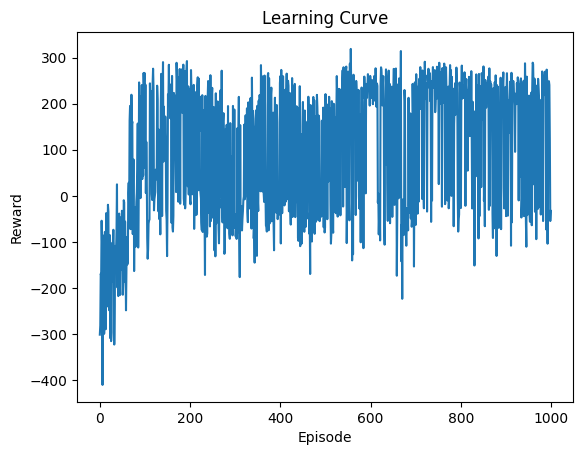

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical


def train_one_step(state, action, reward, next_state, done, gamma):
    state = torch.FloatTensor(state).unsqueeze(0)
    next_state = torch.FloatTensor(next_state).unsqueeze(0)

    # Compute advantage
    advantage = compute_advantage(state, reward, next_state, done, gamma)

    # Update actor network
    actor_optimizer.zero_grad()
    action_probs = actor(state)
    log_prob = torch.log(action_probs[0, action])
    actor_loss = -log_prob * advantage.detach()
    actor_loss.backward()
    actor_optimizer.step()

    # Update critic network
    critic_optimizer.zero_grad()
    target_value = reward + (1 - done) * gamma * critic(next_state)
    critic_loss = F.mse_loss(critic(state), target_value.detach())
    critic_loss.backward()
    critic_optimizer.step()

def train(env, actor, num_episodes=1000, max_steps=1000, gamma=0.99):
    rewards = []

    for episode in range(num_episodes):
        state, _ = env.reset()
        episode_reward = 0

        for step in range(max_steps):
            state_tensor = torch.FloatTensor(state).unsqueeze(0)
            action_probs = actor(state_tensor)
            action = np.random.choice(np.arange(env.action_space), p=action_probs.detach().numpy().squeeze())
            next_state, reward, done, truncated, info = env.step(action)
            
            # Train the networks
            train_one_step(state, action, reward, next_state, done, gamma)

            state = next_state
            episode_reward += reward

            if done:
                break

        rewards.append(episode_reward)
        if (episode + 1) % 10 == 0:
            print(f"Episode {episode + 1}, Reward: {episode_reward}")

    return rewards

# Initialize environment, actor, critic, and optimizers
env = LunarLanderEnv()
state_dim = env.state_space
action_dim = env.action_space
hidden_dim = 256
lr_actor = 1e-4
lr_critic = 1e-3
num_episodes = 1000
max_steps = 1000
gamma = 0.99

actor = Actor(state_dim, action_dim)
critic = Critic(state_dim)
actor_optimizer = optim.Adam(actor.parameters(), lr=lr_actor)
critic_optimizer = optim.Adam(critic.parameters(), lr=lr_critic)

# Train the model
rewards = train(env, actor, num_episodes, max_steps, gamma)

# Plot the learning curve
plt.plot(rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Learning Curve')
plt.show()

# Save the models
torch.save(actor.state_dict(), 'actor.pth')
torch.save(critic.state_dict(), 'critic.pth')


- The learning curve demonstrates that the agent is improving over time but still faces challenges, as indicated by the fluctuating rewards. This could be a typical scenario in environments that are complex or where exploration continues to play a significant role in learning. The agent's policy has improved, but there may still be room for further optimization or learning stability.


In [26]:
import torch
import torch.nn as nn
from moviepy.editor import ImageSequenceClip
import numpy as np
import gymnasium as gym

class LunarLanderEnv:
    def __init__(self):
        self.env = gym.make('LunarLander-v2', render_mode="rgb_array")
        self._state_space = self.env.observation_space.shape[0]
        self._action_space = self.env.action_space.n
        self.__S = list(range(self._state_space))
        self.__A = list(range(self._action_space))

    def reset(self):
        state, info = self.env.reset()
        return state, info

    def step(self, action):
        next_state, reward, done, truncated, info = self.env.step(action)
        return next_state, reward, done, truncated, info

    def render(self):
        return self.env.render()

    @property
    def A(self):
        return list(self.__A)

    @property
    def state_space(self):
        return self._state_space

    @property
    def action_space(self):
        return self._action_space

class Actor(nn.Module):
    def __init__(self, state_space, action_space):
        super(Actor, self).__init__()
        self.fc1 = nn.Linear(state_space, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, action_space)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=-1)  # Output a probability distribution
        return x

def record_video(env, actor, filename='lunar_lander.mp4', fps=30):
    state, _ = env.reset()
    frames = []
    done = False

    while not done:
        frame = env.render()
        frames.append(frame)
        
        state_tensor = torch.FloatTensor(state).unsqueeze(0)
        action_probs = actor(state_tensor)
        action = np.random.choice(np.arange(env.action_space), p=action_probs.detach().numpy().squeeze())
        
        next_state, reward, done, truncated, info = env.step(action)
        state = next_state

    env.env.close()

    print(f"Collected {len(frames)} frames.")
    if frames:
        print(f"Frame shape: {frames[0].shape}")
    else:
        print("No frames collected.")

    # Ensure fps is explicitly set and is a real number
    if not isinstance(fps, (int, float)):
        fps = 30
    clip = ImageSequenceClip(frames, fps=fps)
    clip.write_videofile(filename)

# Load the trained models
state_dim = 8  # for LunarLander-v2
action_dim = 4  # for LunarLander-v2

actor = Actor(state_dim, action_dim)
actor.load_state_dict(torch.load('actor.pth'))
actor.eval()


# Create the environment
env = LunarLanderEnv()

# Record video of the trained agent
record_video(env, actor, filename='lunar_lander.mp4', fps=30)


Collected 328 frames.
Frame shape: (400, 600, 3)
Moviepy - Building video lunar_lander.mp4.
Moviepy - Writing video lunar_lander.mp4



Moviepy - Done !
Moviepy - video ready lunar_lander.mp4
